# Import necessary libraries

In [1077]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report

# Read the CSV and show its first rows

In [1078]:
df = pd.read_csv('./survey-lung-cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Data Visualization
Let's explore the Dataset and see what's going on inisde it.

## Age distribution

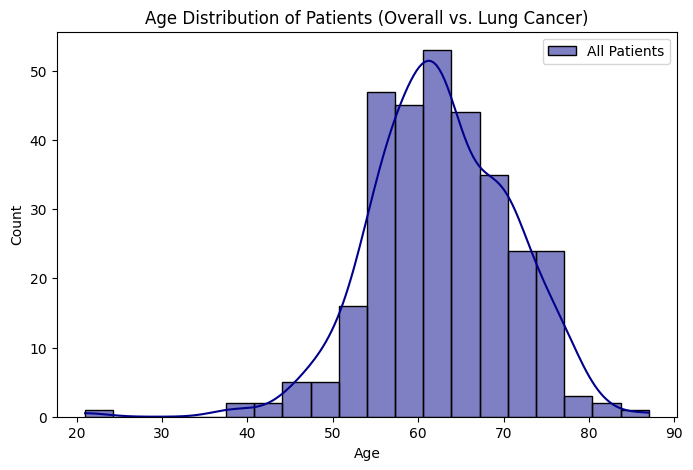

In [1079]:
plt.figure(figsize=(8,5))
sns.histplot(df["AGE"], bins=20, kde=True, color="darkblue", label="All Patients", alpha=0.5)
sns.histplot(df[df["LUNG_CANCER"] == 1]["AGE"], bins=20, kde=True, color="lightblue", label="Lung Cancer Patients", alpha=0.7)
plt.title("Age Distribution of Patients (Overall vs. Lung Cancer)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()

plt.show()

## Gender distribution

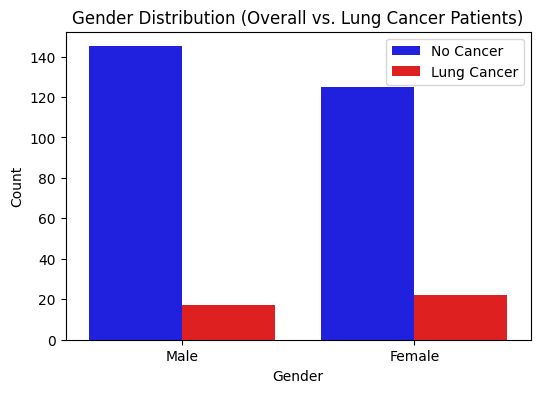

In [1080]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["GENDER"].replace({"M": "Male", "F": "Female"}),  
hue=df["LUNG_CANCER"],  
palette=["blue", "red"])
plt.title("Gender Distribution (Overall vs. Lung Cancer Patients)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["No Cancer", "Lung Cancer"])

plt.show()

## Distribution based on Alcohol consumption

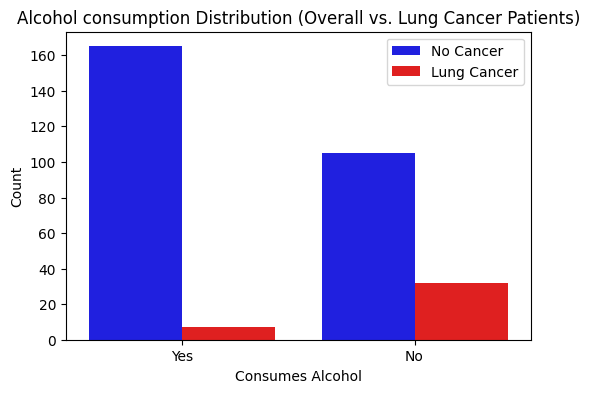

In [1081]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["ALCOHOL CONSUMING"].replace({1: "No", 2: "Yes"}),
hue=df["LUNG_CANCER"],  
palette=["blue", "red"])
plt.title("Alcohol consumption Distribution (Overall vs. Lung Cancer Patients)")
plt.xlabel("Consumes Alcohol")
plt.ylabel("Count")
plt.legend(["No Cancer", "Lung Cancer"])

plt.show()

## Mutual Information Score

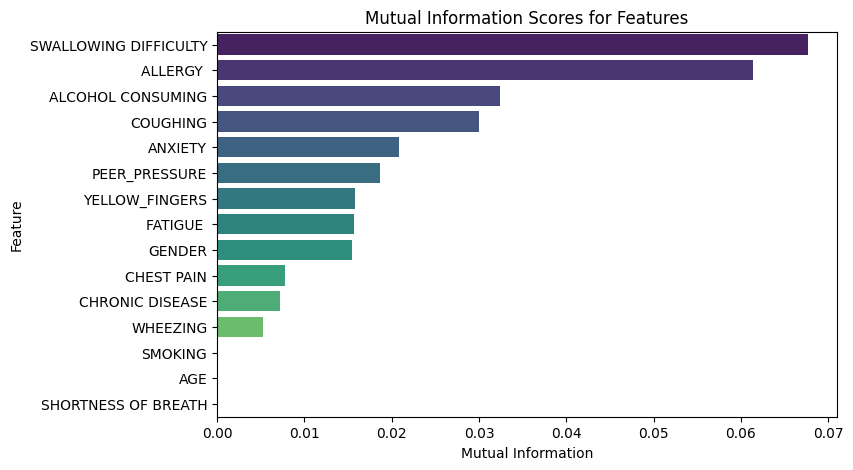

In [1082]:
X_mi = df.copy()
X_mi.loc[df['GENDER'] == 'F', 'GENDER'] = 0
X_mi.loc[df['GENDER'] == 'M', 'GENDER'] = 1
X_mi = X_mi.drop(columns=["LUNG_CANCER"])
y_mi = df["LUNG_CANCER"]
mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features="auto")
mi_df = pd.DataFrame({"Feature": X_mi.columns, "Mutual Information": mi_scores})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Mutual Information", y="Feature", data=mi_df, hue="Feature", palette="viridis", legend=False)
plt.title("Mutual Information Scores for Features")
plt.show()

In the above Data Frame we convert 'Gender' to a boolean type indicating 0 as F and 1 as M.

In [1083]:
df.loc[df['LUNG_CANCER'] == 'YES', 'LUNG_CANCER'] = 1
df.loc[df['LUNG_CANCER'] == 'NO', 'LUNG_CANCER'] = 0

df.loc[df['GENDER'] == 'F', 'GENDER'] = 0
df.loc[df['GENDER'] == 'M', 'GENDER'] = 1

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


So we have totally 309 records with 16 columns

In [1084]:
df.shape

(309, 16)

See how many people in the dataset have Lung Cancer and how many don't.

In [1085]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

As the 'LUNG_CANCER' is the column we need to predict it, we seperate it from the DataFrame into another variable. So 'x' is our Features and 'y' is our outputs.

In [1086]:
x = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [1087]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [1088]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object

In [1089]:
x = np.array(x)
y = np.array(y)

In [1090]:
x

array([[1, 69, 1, ..., 2, 2, 2],
       [1, 74, 2, ..., 2, 2, 2],
       [0, 59, 1, ..., 2, 1, 2],
       ...,
       [1, 58, 2, ..., 1, 1, 2],
       [1, 67, 2, ..., 2, 1, 2],
       [1, 62, 1, ..., 1, 2, 1]], shape=(309, 15), dtype=object)

In [1091]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [1092]:
print(y.dtype)
print(type(y))
y = y.astype(int)
print(y.dtype)

object
<class 'numpy.ndarray'>
int64


# Normalize

In [1093]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [1094]:
x

array([[ 0.95257934,  0.77185028, -1.13529242, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 0.95257934,  1.38182914,  0.88083033, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.04978132, -0.44810745, -1.13529242, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [ 0.95257934, -0.57010322,  0.88083033, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.95257934,  0.52785873,  0.88083033, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [ 0.95257934, -0.08212013, -1.13529242, ..., -1.33558369,
         1.06350105, -1.12047956]], shape=(309, 15))

# Split to Train/Test
We split our DataFrame to training and testing DataFrames by a 80 to 20 percent ratio.

In [1095]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

So 'x_train' is our features of training, 'x_test' is our features of testing, 'y_train' is the training outputs and 'y_test' is the test outputs.

In [1096]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((247, 15), (62, 15), (247,), (62,))

In [1097]:
print(np.unique(y_train))
print(type(y_train))

[0 1]
<class 'numpy.ndarray'>


From now on, we will try different ML algorithms on the data to find out which one fits better and has better accuracy.

# KNN

In [1098]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [1099]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.94      0.91      0.92        53

    accuracy                           0.87        62
   macro avg       0.74      0.79      0.76        62
weighted avg       0.88      0.87      0.88        62



In [1100]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

acc_train, acc_test

(0.9635627530364372, 0.8709677419354839)

In [1101]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[ 6,  3],
       [ 5, 48]])

In [1102]:
p = precision_score(y_test, y_pred_test)
p

0.9411764705882353

In [1103]:
r = recall_score(y_test, y_pred_test)
r

0.9056603773584906

## Visualize Model Outcome

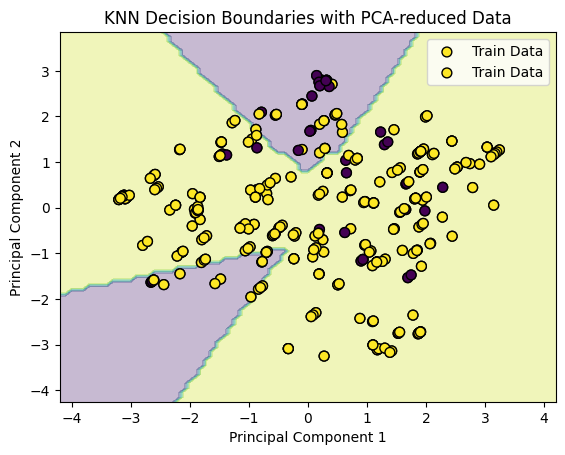

In [1104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)  # Apply PCA for dimensionality reduction

# Step 2: Create a meshgrid for the decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Step 3: Predict on each point in the meshgrid
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))  # Map the grid back to the original space
Z = Z.reshape(xx.shape)

# Step 4: Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)

# Step 5: Plot the training data (in the 2D PCA space)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, marker='o', label='Train Data', edgecolors='k', s=50)

# Step 6: Plot the test data (actual and predicted)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, marker='o', label='Train Data', edgecolors='k', s=50)

# Step 7: Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries with PCA-reduced Data')
plt.legend()
plt.show()